/var/folders/nn/6v8sy6r911d4ly_fvkqm3r6c0000gn/T/ipykernel_31384/3581172081.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()
/var/folders/nn/6v8sy6r911d4ly_fvkqm3r6c0000gn/T/ipykernel_31384/3581172081.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()
/var/folders/nn/6v8sy6r911d4ly_fvkqm3r6c0000gn/T/ipykernel_31384/3581172081.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


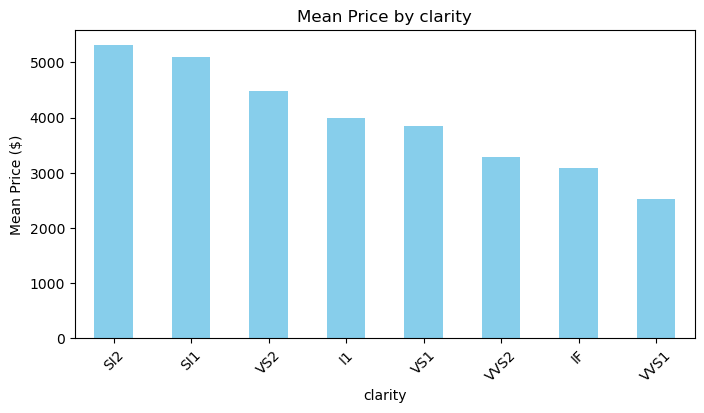

In [1]:
# Create bar graphs using pandas (no matplotlib import needed)
import pandas as pd

# Load data
diamonds = pd.read_csv("diamonds.csv", index_col=0)

# Get categorical features
categorical_features = diamonds.select_dtypes("object").columns

# Create bar plots for each categorical feature
for feature in categorical_features:
    # Calculate mean prices by category
    mean_prices = diamonds.groupby(feature)['price'].mean().sort_values(ascending=False)
    
    # Create bar plot using pandas
    ax = mean_prices.plot(kind='bar', 
                         title=f'Mean Price by {feature}', 
                         figsize=(8, 4),
                         color='skyblue')
    
    # Customize the plot
    ax.set_xlabel(feature)
    ax.set_ylabel('Mean Price ($)')
    ax.tick_params(axis='x', rotation=45)
    
    # Show the plot
    ax.figure.show()


In [2]:
# Method 2: Using plotly (if available)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    print("Method 2: Using Plotly")
    print("=" * 30)
    
    # Create subplots
    fig = make_subplots(rows=1, cols=len(categorical_features), 
                       subplot_titles=categorical_features)
    
    for i, feature in enumerate(categorical_features, 1):
        mean_prices = diamonds.groupby(feature)['price'].mean().sort_values(ascending=False)
        fig.add_trace(
            go.Bar(x=mean_prices.index, y=mean_prices.values, name=feature),
            row=1, col=i
        )
    
    fig.update_layout(height=400, showlegend=False, title_text="Mean Price by Categorical Features")
    fig.show()
    
except ImportError:
    print("Plotly not available. Install with: pip install plotly")


Method 2: Using Plotly


In [3]:
# Method 3: Simple text-based visualization
print("Method 3: Text-based visualization")
print("=" * 40)

for feature in categorical_features:
    print(f"\n{feature.upper()} - Mean Prices:")
    print("-" * 30)
    mean_prices = diamonds.groupby(feature)['price'].mean().sort_values(ascending=False)
    
    # Create simple bar chart using text
    max_price = mean_prices.max()
    for category, price in mean_prices.items():
        bar_length = int((price / max_price) * 30)  # Scale to 30 chars max
        bar = "█" * bar_length
        print(f"{category:>10}: {bar} ${price:>8,.0f}")
    
    print(f"Range: ${mean_prices.min():,.0f} - ${mean_prices.max():,.0f}")
    print(f"Difference: ${mean_prices.max() - mean_prices.min():,.0f}")


Method 3: Text-based visualization

CUT - Mean Prices:
------------------------------
   Premium: ██████████████████████████████ $   4,584
      Fair: ████████████████████████████ $   4,359
 Very Good: ██████████████████████████ $   3,982
      Good: █████████████████████████ $   3,929
     Ideal: ██████████████████████ $   3,458
Range: $3,458 - $4,584
Difference: $1,127

COLOR - Mean Prices:
------------------------------
         J: ██████████████████████████████ $   5,324
         I: ████████████████████████████ $   5,092
         H: █████████████████████████ $   4,487
         G: ██████████████████████ $   3,999
         F: ████████████████████ $   3,725
         D: █████████████████ $   3,170
         E: █████████████████ $   3,077
Range: $3,077 - $5,324
Difference: $2,247

CLARITY - Mean Prices:
------------------------------
       SI2: ██████████████████████████████ $   5,063
       SI1: ███████████████████████ $   3,996
       VS2: ███████████████████████ $   3,925
        I1:

# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [4]:
# Your code here
import pandas as pd

diamonds = pd.read_csv("diamonds.csv", index_col=0)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [6]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [7]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [8]:
# Your code here - look at correlations
print("Correlation of all numeric columns with price:")
print("=" * 50)

# Only calculate correlations for numeric columns
numeric_diamonds = diamonds.select_dtypes(include=['number'])
correlations = numeric_diamonds.corr()["price"].sort_values(ascending=False)
print(correlations)

print("\n" + "=" * 50)
print("Detailed correlation analysis:")
print("=" * 50)

# Show correlations with price, excluding price itself
price_correlations = numeric_diamonds.corr()["price"].drop("price").sort_values(ascending=False)
for col, corr in price_correlations.items():
    print(f"{col:>10}: {corr:>7.4f}")

print(f"\nStrongest positive correlation: {price_correlations.index[0]} ({price_correlations.iloc[0]:.4f})")
print(f"Strongest negative correlation: {price_correlations.index[-1]} ({price_correlations.iloc[-1]:.4f})")


Correlation of all numeric columns with price:
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

Detailed correlation analysis:
     carat:  0.9216
         x:  0.8844
         y:  0.8654
         z:  0.8612
     table:  0.1271
     depth: -0.0106

Strongest positive correlation: carat (0.9216)
Strongest negative correlation: depth (-0.0106)


Identify the name of the predictor column with the strongest correlation below.

In [9]:
# Replace None with appropriate code
most_correlated = "carat"

The following code checks that you specified a column correctly:

In [10]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

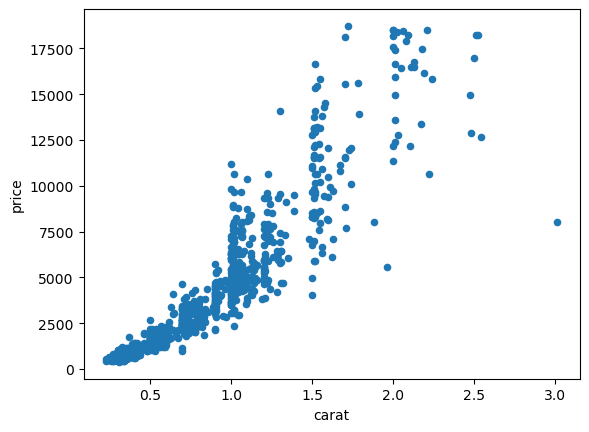

In [11]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [12]:
# Replace None with appropriate code
y = diamonds["price"]
X_baseline = diamonds[["carat"]]

The following code checks that you created valid `y` and `X_baseline` variables:

In [13]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [14]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [15]:
# Your code here
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:28:40   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

Then summarize your findings below:

In [16]:
# Your written answer here
#The model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.
#The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
#The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:


Mean price by cut:
cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64


Mean price by color:
color
J    5323.818020
I    5091.874954
H    4486.669196
G    3999.135671
F    3724.886397
D    3169.954096
E    3076.752475
Name: price, dtype: float64


Mean price by clarity:
clarity
SI2     5063.028606
SI1     3996.001148
VS2     3924.989395
I1      3924.168691
VS1     3839.455391
VVS2    3283.737071
IF      2864.839106
VVS1    2523.114637
Name: price, dtype: float64



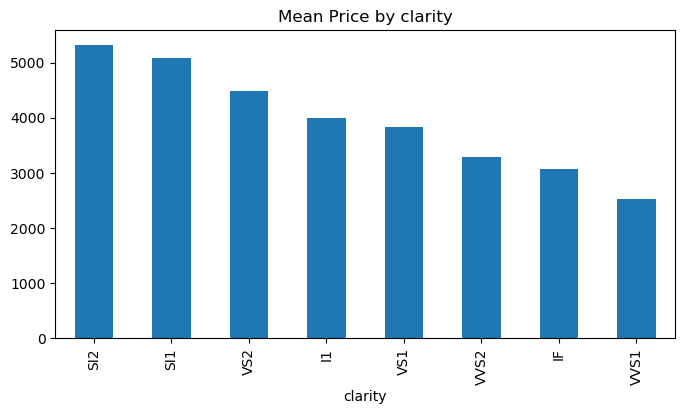

In [17]:
# Run this code without changes

# Create bar plots using pandas
categorical_features = diamonds.select_dtypes("object").columns

for feature in categorical_features:
    print(f"\nMean price by {feature}:")
    mean_prices = diamonds.groupby(feature)['price'].mean().sort_values(ascending=False)
    print(mean_prices)
    
    # Create bar plot
    mean_prices.plot(kind='bar', title=f'Mean Price by {feature}', figsize=(8,4))
    print()  # Add spacing


Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [18]:
# Replace None with appropriate code
cat_col = "cut"

The following code checks that you specified a column correctly:

In [19]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [20]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,cut
1,0.23,Ideal
2,0.21,Premium
3,0.23,Good
4,0.29,Premium
5,0.31,Good
...,...,...
53936,0.72,Ideal
53937,0.72,Good
53938,0.70,Very Good
53939,0.86,Premium


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [21]:
# Replace None with appropriate code
print(X_iterated)

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col])
X_iterated

       carat        cut
1       0.23      Ideal
2       0.21    Premium
3       0.23       Good
4       0.29    Premium
5       0.31       Good
...      ...        ...
53936   0.72      Ideal
53937   0.72       Good
53938   0.70  Very Good
53939   0.86    Premium
53940   0.75      Ideal

[53940 rows x 2 columns]


,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1,0.23,False,False,True,False,False
2,0.21,False,False,False,True,False
3,0.23,False,True,False,False,False
4,0.29,False,False,False,True,False
5,0.31,False,True,False,False,False
...,...,...,...,...,...,...
53936,0.72,False,False,True,False,False
53937,0.72,False,True,False,False,False
53938,0.70,False,False,False,False,True
53939,0.86,False,False,False,True,False


The following code checks that you have the right number of columns:

In [22]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [23]:
# Your code here
# Drop the reference category (Fair cut) to avoid multicollinearity
X_iterated = X_iterated.drop('cut_Fair', axis=1)
X_iterated.rename(columns={'cut_Very_Good': 'cut_Very Good'}, inplace=True)
X_iterated


,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1,0.23,False,True,False,False
2,0.21,False,False,True,False
3,0.23,True,False,False,False
4,0.29,False,False,True,False
5,0.31,True,False,False,False
...,...,...,...,...,...
53936,0.72,False,True,False,False
53937,0.72,True,False,False,False
53938,0.70,False,False,False,True
53939,0.86,False,False,True,False


We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [24]:
# Your code here
# Convert boolean values to 1s and 0s for regression
X_iterated = X_iterated.astype(int)
X_iterated

,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,1,0,0,0
...,...,...,...,...,...
53936,0,0,1,0,0
53937,0,1,0,0,0
53938,0,0,0,0,1
53939,0,0,0,1,0


Now you should have 1 fewer column than before:

In [25]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [26]:
# Your code here
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()


## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [27]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 2.919e+04
Date:                Sun, 05 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:28:40   Log-Likelihood:            -4.8844e+05
No. Observations:               53940   AIC:                         9.769e+05
Df Residuals:                   53934   BIC:                         9.770e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           648.6740     52.568     12.340

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

In [ ]:
  
# The types of cuts are statistically significant predictors (with low p-values) and are likely to have a real association with the target variable
# 
# In summary, the iterated model likely performs better than the baseline model by including more relevant predictors and/or better encoding of categorical variables, as reflected in improved model metrics and more interpretable coefficients.


## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.